In [8]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#loading data
df=pd.read_csv("supermarket_sales - Sheet1.csv")

In [9]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [11]:
df.shape

(1000, 17)

In [12]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [13]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.set_index('Date',inplace =True)

In [16]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [17]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [18]:
#to check the null values
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [20]:
avg_unit_price = df["Unit price"].astype("float").mean(axis=0)
df["Unit price"].replace(np.nan, avg_unit_price, inplace=True)

In [21]:
from scipy import stats
mode=stats.mode(df['Quantity'])

print(mode)

ModeResult(mode=array([10], dtype=int64), count=array([119]))


C:\Users\hpopm\AppData\Local\Temp\ipykernel_21920\3683354630.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode=stats.mode(df['Quantity'])


In [22]:
df['Quantity'].replace(np.nan, "mode", inplace=True)

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [26]:
df.corr()

C:\Users\hpopm\AppData\Local\Temp\ipykernel_21920\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


In [28]:
np.round(df.corr(),2)

C:\Users\hpopm\AppData\Local\Temp\ipykernel_21920\1998717259.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(df.corr(),2)


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.00,0.01,0.63,0.63,0.63,NaN,0.63,-0.01
Quantity,0.01,1.00,0.71,0.71,0.71,NaN,0.71,-0.02
Tax 5%,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Total,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
cogs,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.63,0.71,1.00,1.00,1.00,NaN,1.00,-0.04
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,NaN,-0.04,1.00


C:\Users\hpopm\AppData\Local\Temp\ipykernel_21920\3554208772.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(df.corr(),2),annot=True)


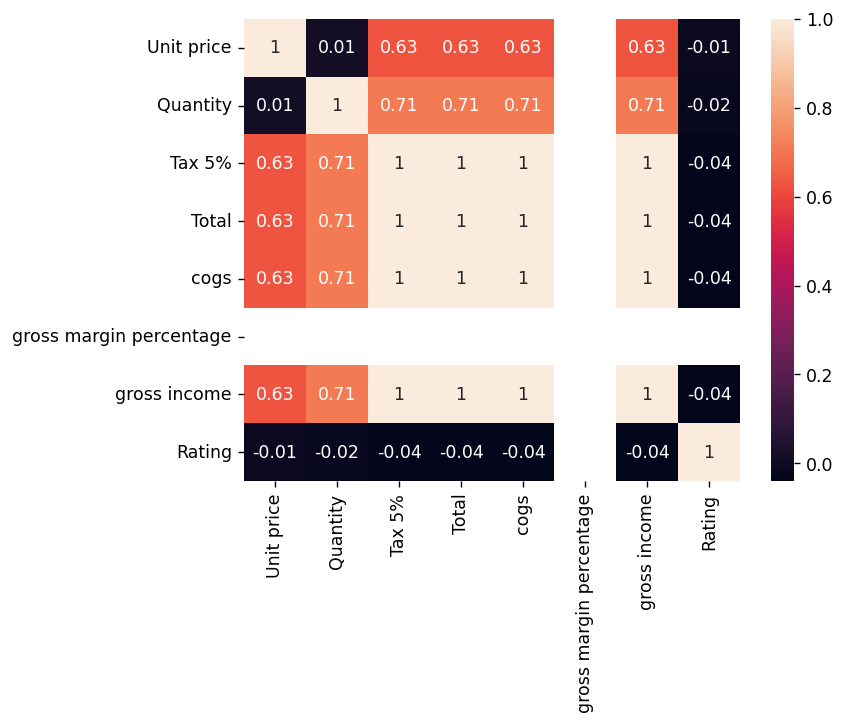

In [29]:
#   EXPLORATORY DATA ANALYSIS

plt.figure(dpi=125)
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

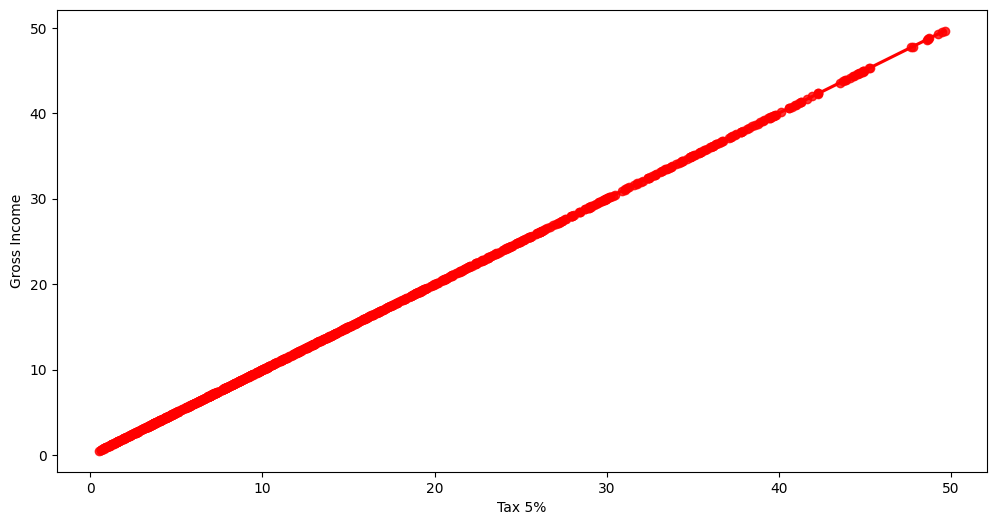

In [31]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Tax 5%',y='gross income',data=df,color='Red')
plt.xlabel('Tax 5%')
plt.ylabel('Gross Income')
plt.show()

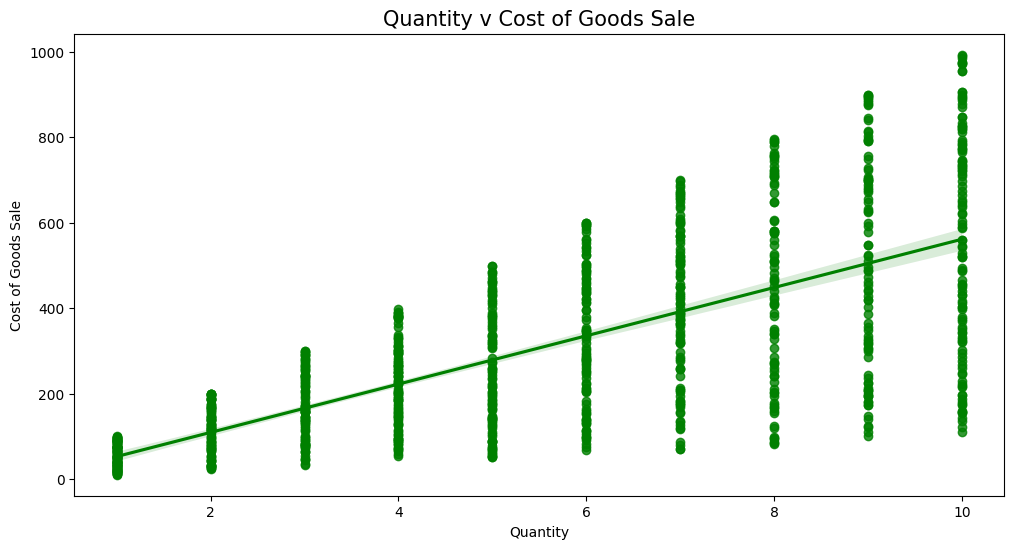

In [32]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Quantity',y='cogs',data=df,color='green')
plt.xlabel('Quantity')
plt.ylabel('Cost of Goods Sale')
plt.title('Quantity v Cost of Goods Sale',fontsize=15)
plt.show()

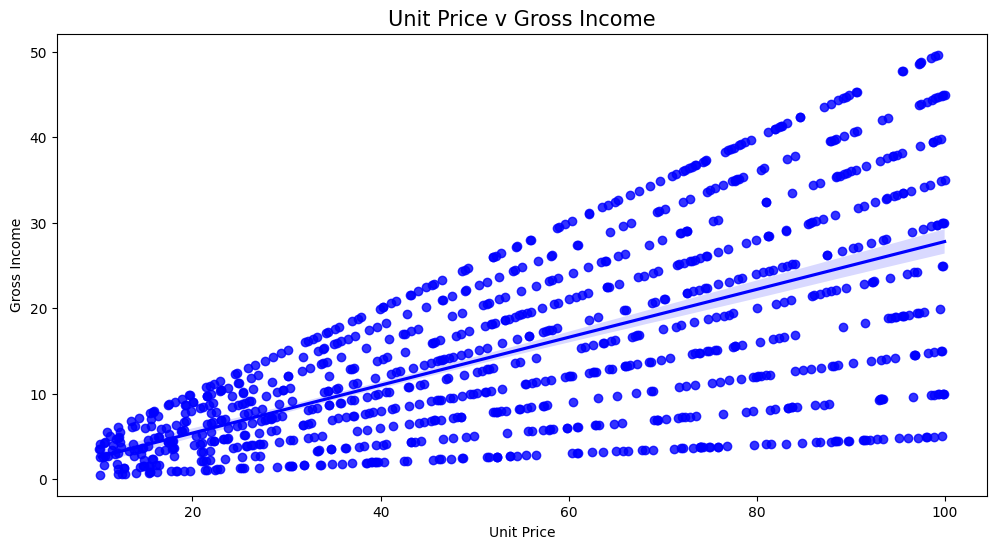

In [33]:
plt.figure(figsize=(12,6),dpi=100)
sns.regplot(x='Unit price',y='gross income',data=df,color='blue')
plt.xlabel('Unit Price')
plt.ylabel('Gross Income')
plt.title('Unit Price v Gross Income',fontsize=15)
plt.show()

C:\Users\hpopm\AppData\Local\Temp\ipykernel_21920\966822030.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Rating'],kde=False)


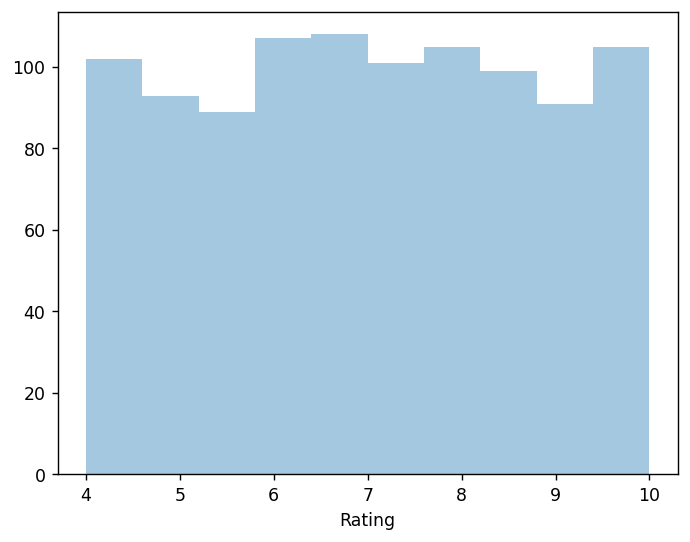

In [34]:
# To see the distribution of different ratings
plt.figure(dpi=125) 
sns.distplot(df['Rating'],kde=False)
plt.show()

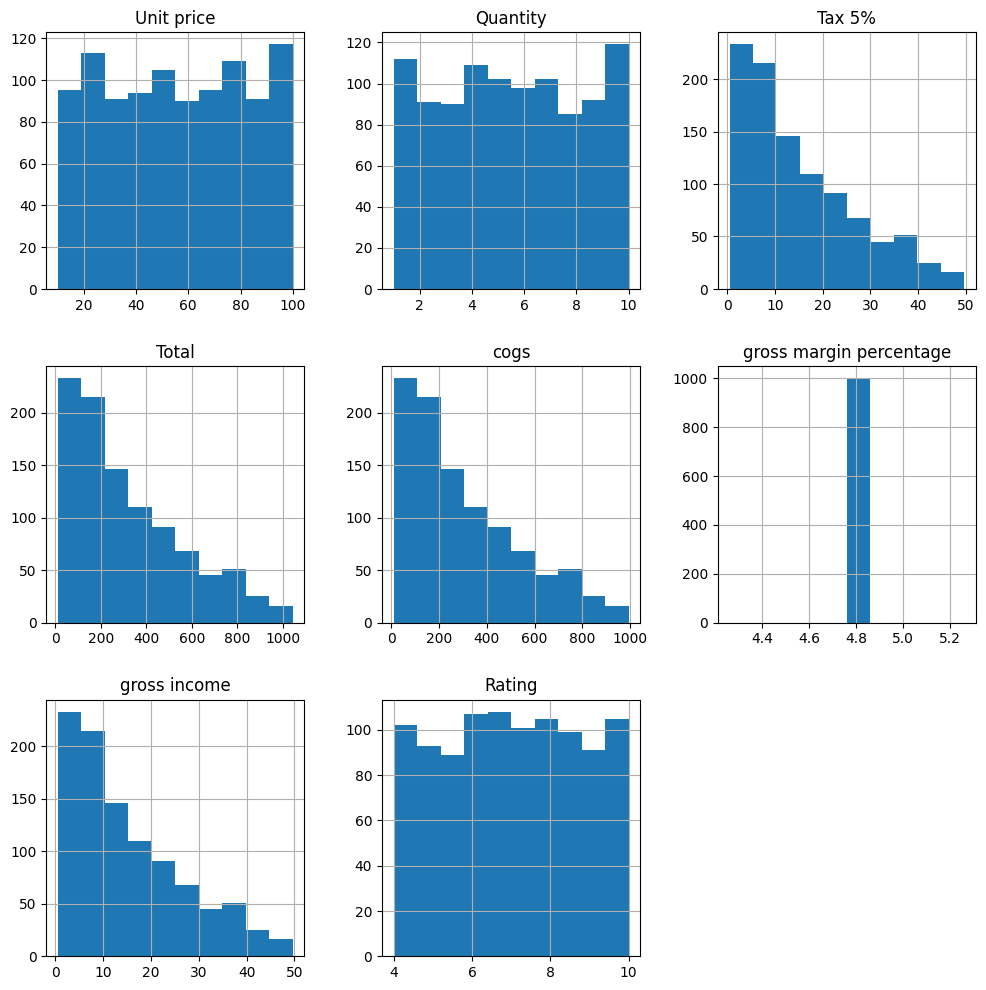

In [35]:
# Plotting Histogram for all
df.hist(figsize=(12,12))
plt.show()

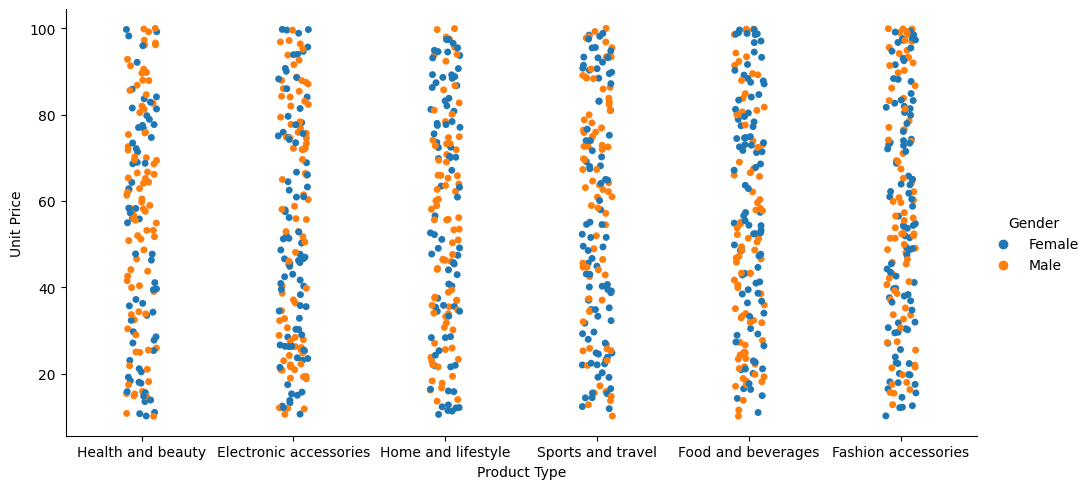

In [41]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=df,aspect=2)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

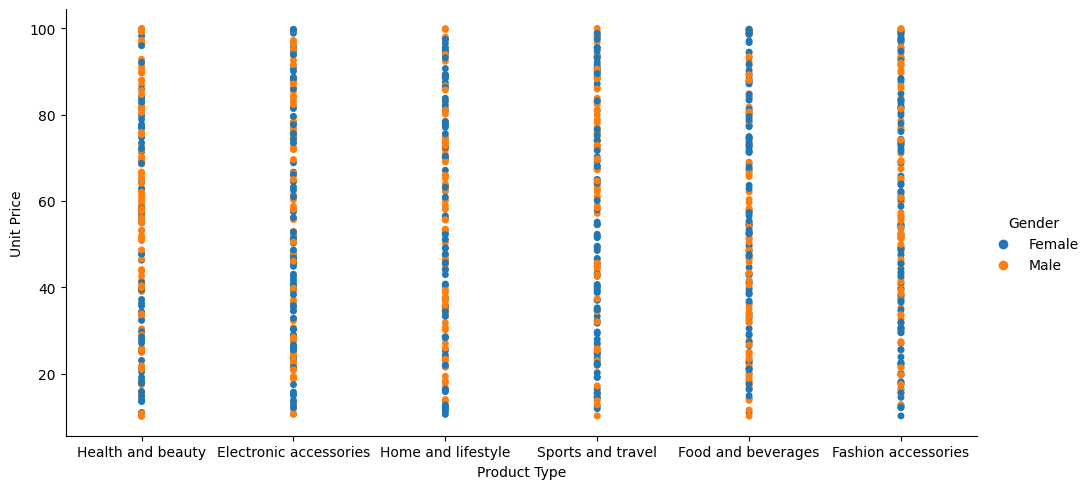

In [42]:
sns.catplot(x='Product line',y='Unit price',hue='Gender',data=df,aspect=2,jitter=False)
plt.xlabel('Product Type')
plt.ylabel('Unit Price')
plt.show()

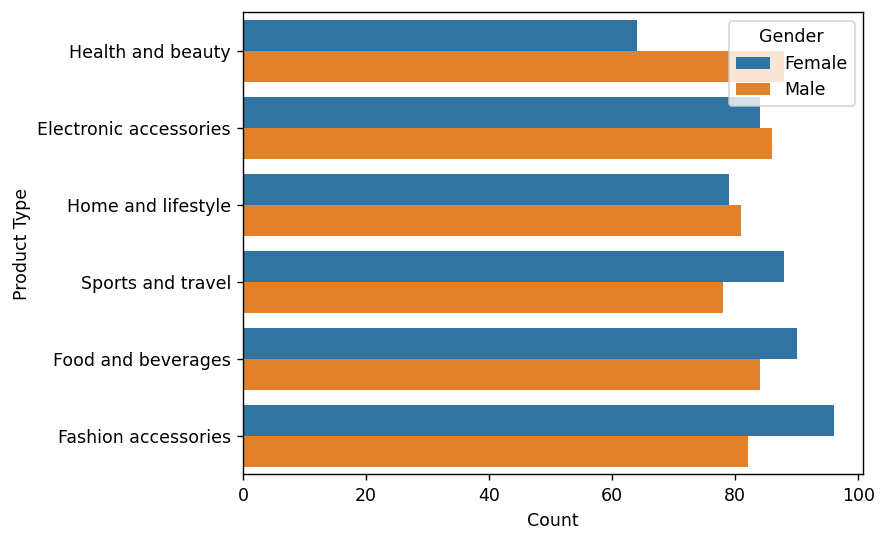

In [43]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "Gender", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

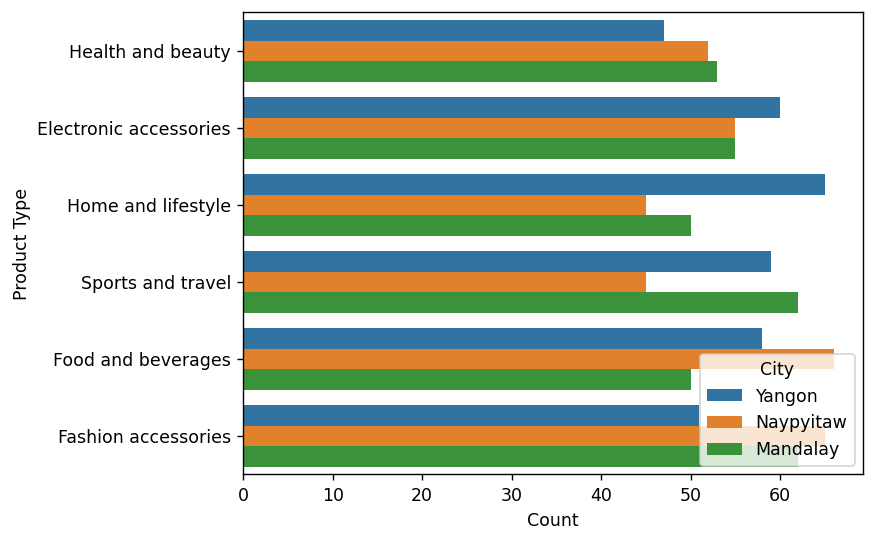

In [44]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()